<a href="https://colab.research.google.com/github/tephlonee/housing_prediction/blob/main/Lab5_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [ ]:
y = y.astype(np.uint8)

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV , train_test_split
from scipy.stats import loguniform
from sklearn.decomposition import PCA


rbf_svc_clf = SVC(kernel = 'rbf')
param_distributions = {
    'C': loguniform(1e-3, 1e3),      # wide range for regularization strength
    'gamma': ['scale'] + list(loguniform(1e-4, 1e-1).rvs(10))   # wide range for RBF kernel parameter
}

# 4. RandomizedSearchCV setup
random_search = RandomizedSearchCV(
    estimator=rbf_svc_clf,
    param_distributions=param_distributions,
    n_iter=5,             # number of random combinations to try
    scoring='accuracy',    # or another metric like 'f1', 'roc_auc'
    cv=5,                  # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# 5. Fit search
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [ ]:
from sklearn.svm import SVC

import time
start = time.time()
svm_rbf_clf = SVC(kernel = 'rbf' , C = 10 , gamma = 'scale')
svm_rbf_clf.fit(X_train , y_train)
print('Time taken: ', time.time() - start)

Time taken:  800.8034963607788


In [ ]:
from sklearn.metrics import accuracy_score
svm_rbf_clf_y_pred = svm_rbf_clf.predict(X_test)
accuracy_score(y_test , svm_rbf_clf_y_pred)

0.9837

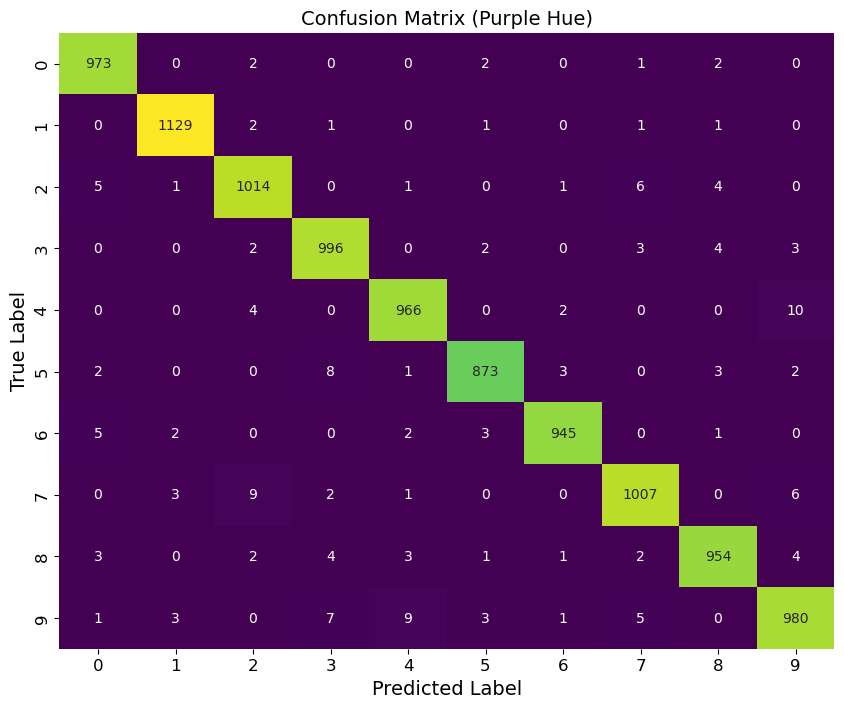

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, svm_rbf_clf_y_pred)

# Plot with Seaborn and purple hue
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', cbar=False)
plt.title("Confusion Matrix (Purple Hue)", fontsize=14)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score , f1_score , precision_score , recall_score
print('Precision: ' , precision_score(y_test , svm_rbf_clf_y_pred , average = 'macro'))
print('Recall: ', recall_score(y_test , svm_rbf_clf_y_pred, average = 'macro'))
print('F1 Score: ' , f1_score(y_test , svm_rbf_clf_y_pred , average = 'macro'))

Precision:  0.9836848236623442
Recall:  0.9835400663303396
F1 Score:  0.9836050009820827


In [ ]:

# 6. Results
print("Best Parameters:", random_search.best_params_)
print("Best CV Score:", random_search.best_score_)

In [ ]:
models = ['KNN', 'SGD', 'RND', 'LSVM', 'PSVM', 'RBF']

<Figure size 600x400 with 0 Axes>

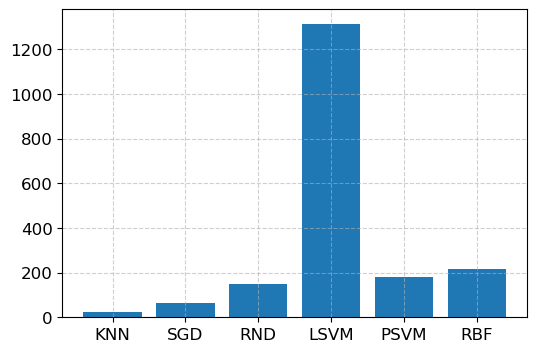

In [ ]:
plt.figure(figsize = (6 , 4))
plt.bar(models , np.array([24.36 , 64.58 ,  149.23 , 1314.0805587768555 , 180.7 , 215.81]))
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

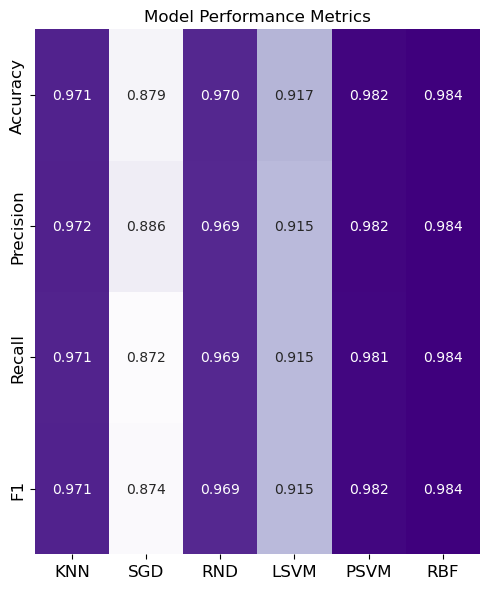

In [ ]:
import seaborn as sns
import pandas as pd

accuracy = [0.9714, 0.879, 0.9695,  0.917, 0.9817, 0.9837]
precision = [0.9715, 0.886, 0.969, 0.915, 0.9816, 0.9836]
recall = [0.9710, 0.872, 0.969, 0.915, 0.9814, 0.9835]
f1 = [0.9712, 0.874, 0.969, 0.915, 0.9815, 0.9836]


data = {

    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1': f1
}
df = pd.DataFrame(data, index=models)

plt.figure(figsize=(5, 6))
sns.heatmap(df.T, annot=True, cmap='Purples', fmt=".3f", cbar=False)
plt.title("Model Performance Metrics")
plt.tight_layout()
plt.show()

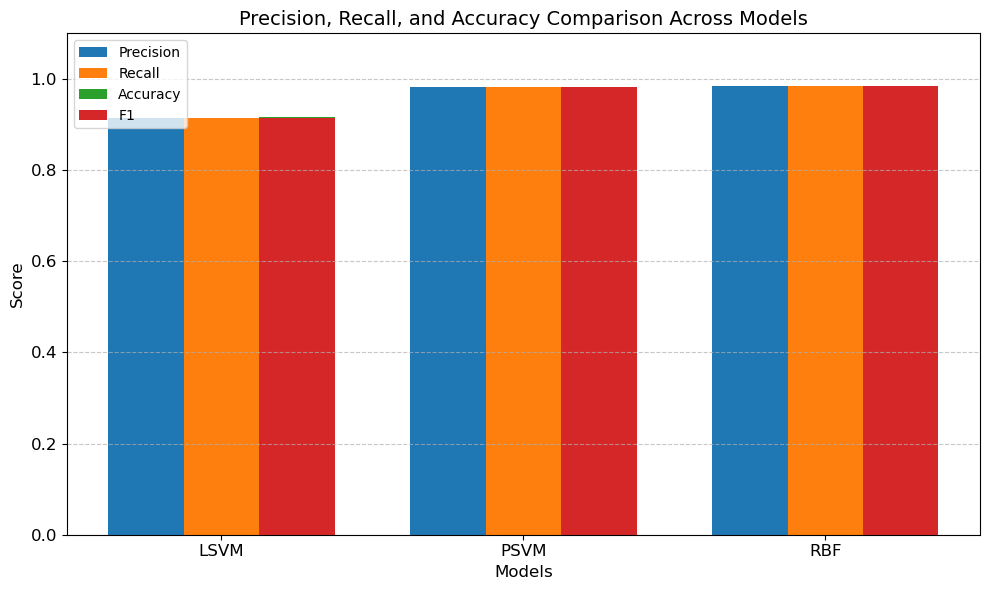

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data

models = models[3:]
accuracy = accuracy[3:]
precision = precision[3:]
recall = recall[3:]
f1 = f1[3:]

bar_width = 0.25
x = np.arange(len(models))

# Plot bars
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width, precision, width=bar_width, label='Precision')
plt.bar(x, recall, width=bar_width, label='Recall')
plt.bar(x + bar_width, accuracy, width=bar_width, label='Accuracy')
plt.bar(x + bar_width, f1, width=bar_width, label='F1')

# Add labels and title
plt.xlabel('Models', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Precision, Recall, and Accuracy Comparison Across Models', fontsize=14)
plt.xticks(x, models)
plt.ylim(0, 1.1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
X = np.array([33 , 48 , 63 , 78 , 93  , 108 , 123, 138 , 153 , 168 , 173])
y = np.array([1128 , 1186 , 1243 , 1301 , 1358 , 1415 , 1472 , 1528 , 1584 , 1640 , 1658])

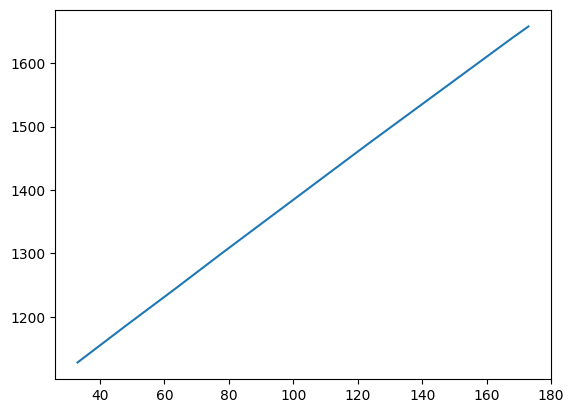

In [ ]:
plt.plot(X , y)
plt.show()

In [ ]:
Z = np.array([0 , 1.199117 , 2.3288114 , 3.3996018 , 4.4156957 , 5.3791967 , 6.2943123 , 7.164198, 7.9951651 , 8.7861615 , 9.0417628])

In [ ]:
Z.shape

(11,)

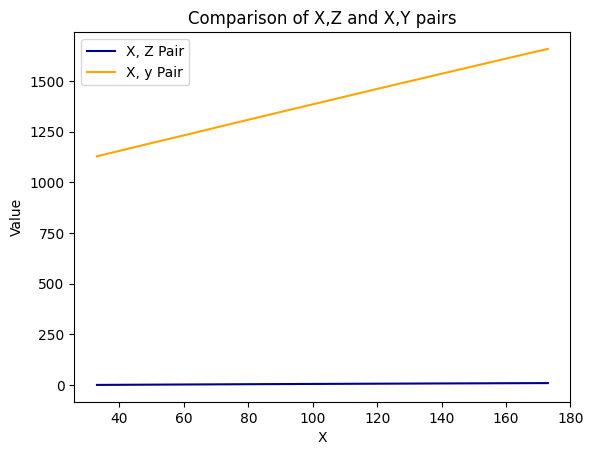

In [ ]:
plt.plot(X , Z, label='X, Z Pair', color='darkblue')
plt.plot(X , y, label='X, y Pair', color='orange')
plt.xlabel('X')
plt.ylabel('Value')
plt.title('Comparison of X,Z and X,Y pairs')
plt.legend()
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Reshape Z and y to be 2D arrays (required by MinMaxScaler)
Z_reshaped = Z.reshape(-1, 1)
y_reshaped = y.reshape(-1, 1)

# Fit the scaler on y
scaler.fit(y_reshaped)

# Transform Z using the scaler fitted on y, and then inverse transform it
Z_scaled = scaler.inverse_transform(scaler.transform(Z_reshaped))

print("Scaled Z:")
print(Z_scaled)

Scaled Z:
[[0.       ]
 [1.199117 ]
 [2.3288114]
 [3.3996018]
 [4.4156957]
 [5.3791967]
 [6.2943123]
 [7.164198 ]
 [7.9951651]
 [8.7861615]
 [9.0417628]]


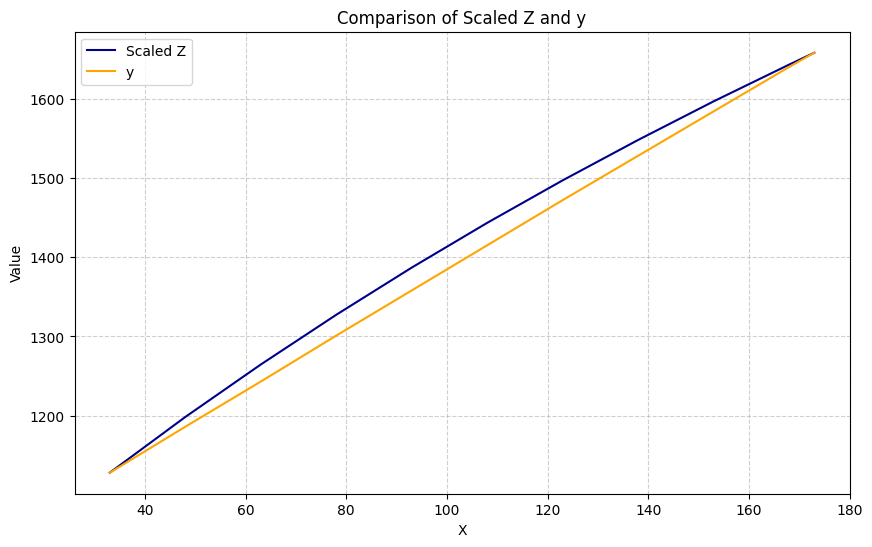

In [ ]:
# Plot the scaled Z and y against X
plt.figure(figsize=(10, 6))
plt.plot(X, z_scaled_to_x, label='Scaled Z', color='darkblue')
plt.plot(X, y, label='y', color='orange')
plt.xlabel('X')
plt.ylabel('Value')
plt.title('Comparison of Scaled Z and y')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
z_scaled_to_x = (Z - Z.min()) / (Z.max() - Z.min()) * (y.max() - y.min()) + y.min()

print(z_scaled_to_x)

[1128.         1198.28850724 1264.50767768 1327.27407894 1386.83434157
 1443.31177206 1496.95300096 1547.94299386 1596.65169953 1643.01744715
 1658.        ]


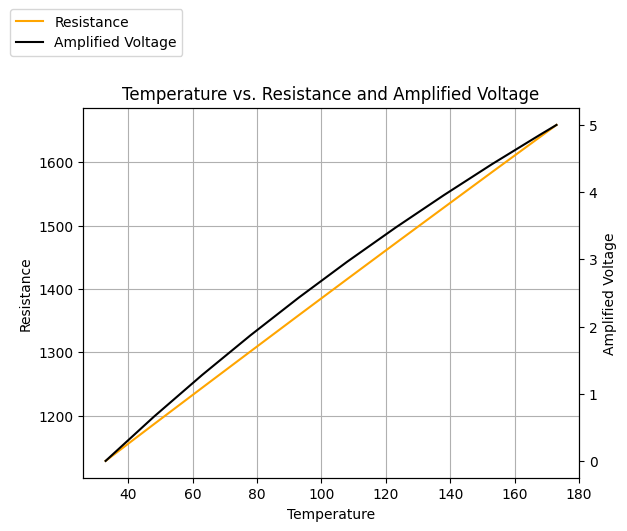

In [ ]:
import matplotlib.pyplot as plt

# Sample data
x = [33 , 48 , 63 , 78 , 93 , 108 , 123 , 138 , 153 , 168 , 173]
y1 = [1128.3, 1186.3, 1243.9, 1301.3, 1358.5, 1415.4, 1472, 1528.3, 1584.5, 1640.3 , 1658.9]      # For the left y-axis
y2 = [0 , 0.6581, 1.28, 1.87, 2.431, 2.964 , 3.471 ,3.954 , 4.417 , 4.857 , 5]          # For the right y-axis

# Create a figure and axis
fig, ax1 = plt.subplots()

# Plot the first line on the left y-axis
ax1.plot(x, y1, color='orange', label='Resistance')
ax1.set_xlabel('Temperature')
ax1.set_ylabel('Resistance', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()
ax2.plot(x, y2, color='black', label='Amplified Voltage')
ax2.set_ylabel('Amplified Voltage', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Optional: add grid and title
ax1.grid(True)
plt.title("Temperature vs. Resistance and Amplified Voltage")

# Combine legends and place them in the upper left
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
fig.legend(lines1 + lines2, labels1 + labels2, loc='upper left' , bbox_to_anchor = (0.0 , 1.1))


# Show plot
plt.show()